### 1. 라이브러리

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

# 시각화 한글 폰트
import os
plt.rc("font", family="Malgun Gothic")

### 2. 데이터 확인 

In [2]:
# ap2021 = pd.read_csv('202021.csv')
# ap2021 = ap2021[ap2021['pt_year']==2021]

# # 이동형 데이터 
# Move = ap2021[ap2021['ap_type']=='이동형']

# # 제주 동부지역 추출 
# East_jeju = ap2021[ap2021['ap_address_detail'].str.contains('조천|구좌|성산|일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]

# East_jeju.to_csv('East_jeju.csv', index=False)
# Move.to_csv('Move.csv', index=False)

In [3]:
# 고정형 데이터 
fixed1819 = pd.read_csv('fixed 1819.csv')
fixed20 = pd.read_csv('fixed 2020.csv')

In [4]:
# 동부 제주 
East_jeju = pd.read_csv('East_jeju.csv')
# 이동형
Move = pd.read_csv('Move.csv')

### 3. 결측치 확인 및 처리

**동부 제주 데이터**

In [5]:
East_jeju.isna().sum()

base_date                   0
user_id                     0
mac_address                 0
upload                      0
download                    0
session_time                0
nationality                 0
province             25517125
gender                      0
age                         0
visit_type                  0
ap_type                     0
ap_category                 0
ap_place                    0
ap_place_detail             0
ap_latitude                 0
ap_longitude                0
ap_address_detail           0
pt_year                     0
pt_month                    0
dtype: int64

- 전체 27,325,901 행 중 25,517,125개의 결측값을 갖는 **province 열 삭제** 

In [6]:
East_jeju = East_jeju.drop(['province'], axis=1)

**이동형**

In [7]:
Move.isna().sum()

base_date                   0
user_id                     0
mac_address                 0
upload                      0
download                    0
session_time                0
nationality               282
province             19203798
gender                      0
age                         0
visit_type                522
ap_type                     0
ap_category                 0
ap_place             20361447
ap_place_detail             0
ap_latitude          20361447
ap_longitude         20361447
ap_address_detail    20361447
pt_year                     0
pt_month                    0
dtype: int64

- 전체 20,361,447 행 중 19,203,798개 결측치가 존재하는 **province 열 삭제**   
- 이동형에 존재하지 않는 **ap 정보 열 삭제**   
- **국적과 방문유형 "알 수 없음"** 대체

In [8]:
Move = Move.drop(['province'], axis=1)

In [9]:
Move = Move.drop(['ap_place', 'ap_latitude', 'ap_longitude', 'ap_address_detail'], axis=1)

In [10]:
Move['nationality'].fillna("알 수 없음", inplace = True)
Move['visit_type'].fillna("알 수 없음", inplace = True)

**고정형 데이터**

In [11]:
fixed1819.isna().sum()

base_date                     0
mac_address                   0
ap_install_place              0
install_location_detail       0
open_date                  2341
category                     32
address_dong                  0
address_detail                0
latitude                      0
longitude                     0
pt_year                       0
pt_month                      0
dtype: int64

In [12]:
fixed20.isna().sum()

base_date                   0
manage_no                   0
mac_address                 0
ap_group_name               0
install_location_detail     2
open_date                   0
category                    0
category_detail            22
address_dong                4
address_detail              0
latitude                    0
longitude                   0
pt_year                     0
pt_month                    0
dtype: int64

### 4. 동부 지역별 데이터프레임화

In [13]:
# 조천읍
Jocheon = East_jeju[East_jeju['ap_address_detail'].str.contains('조천', na=False)]

# 구좌읍
Gujwa = East_jeju[East_jeju['ap_address_detail'].str.contains('구좌', na=False)]

# 서귀포 성산읍
Seongsan = East_jeju[East_jeju['ap_address_detail'].str.contains('성산', na=False)]

# 구제주
Gujeju = East_jeju[East_jeju['ap_address_detail'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]

### 5. 거주민 이용가능한 ap 정보

In [15]:
East_jeju.head()

,base_date,user_id,mac_address,upload,download,session_time,nationality,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
1,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,88,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
2,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,328,0,2,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
3,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,60,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
4,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1


1) category별 방문유형 별 접속 수 

In [37]:
visit_type = ['거주', '관광', '기타', '업무', '국제회의 및 인센티브 투어']
empty = []

def visit_type_len(a):
    for i in visit_type:
        accpt_len = len(East_jeju[(East_jeju['visit_type']==i)&(East_jeju['ap_category']==a)])
        empty.append(accpt_len)

    df = pd.DataFrame({'visit_type' : visit_type, '접속 횟수' : empty})
    return df 

In [61]:
# 국제회의 및 인센티브 투어 > 짧게 매핑 필

**거주 > 관광 : 버정, 테마거리, 전기차충전소, 공원, 체육시설, 지하상가, 요양병원, 학습관, 전통시장, 박물관, 장례식장, 도서관, 공공기관, 미술관, 관공서** 
>  
**테마거리, 광장, 공항, 다중이용시설, 공공기관은 거주와 관광객이 비슷함**   
**장례식장과 공공기관에서 관광객의 접속수가 의외로 높게 나온다.**

Text(0.5, 1.0, '항구')

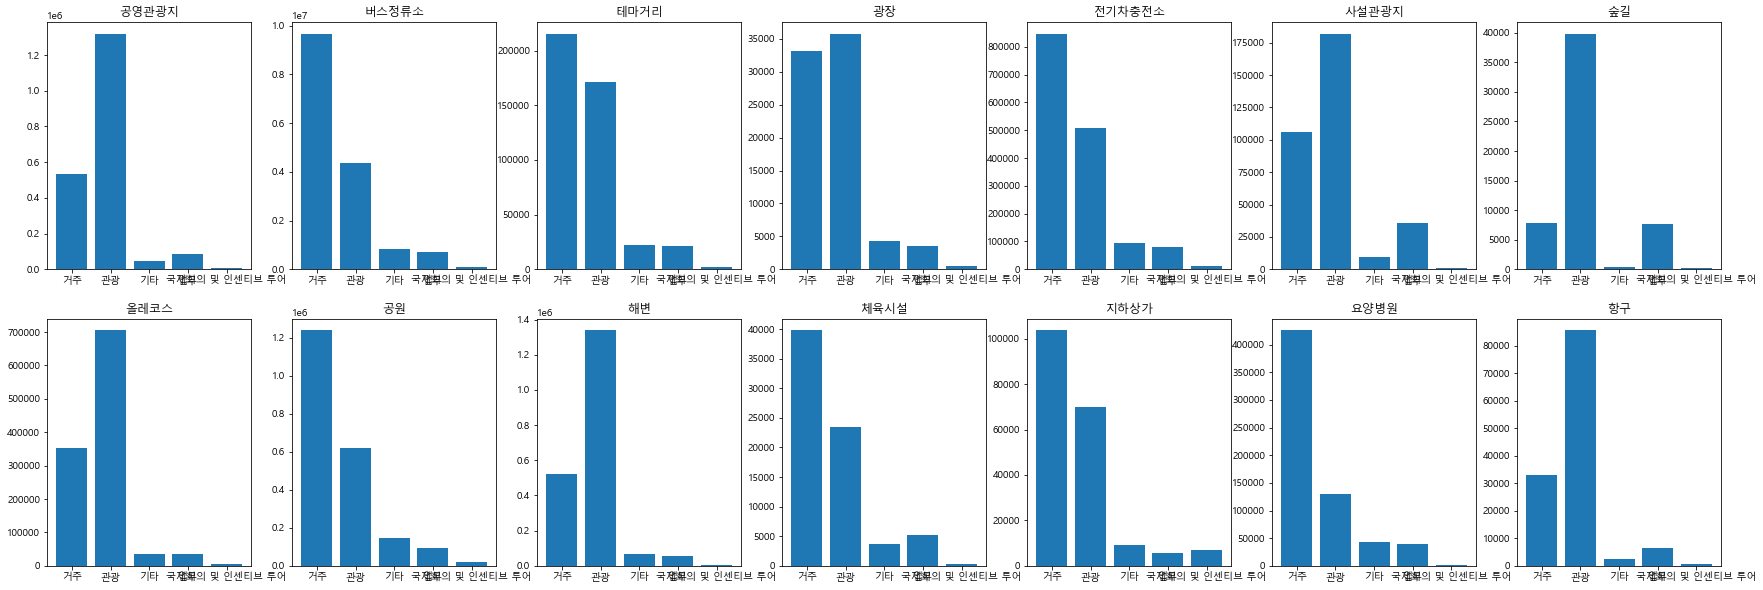

In [60]:
fig, axes = plt.subplots(2,7)
fig.set_size_inches(30,10)


x = visit_type_len('공영관광지')['visit_type']
y = visit_type_len('공영관광지')['접속 횟수']
axes[0,0].bar(x,y)

x = visit_type_len('버스정류소')['visit_type']
y = visit_type_len('버스정류소')['접속 횟수']
axes[0,1].bar(x,y)

x = visit_type_len('테마거리')['visit_type']
y = visit_type_len('테마거리')['접속 횟수']
axes[0,2].bar(x,y)

x = visit_type_len('광장')['visit_type']
y = visit_type_len('광장')['접속 횟수']
axes[0,3].bar(x,y)

x = visit_type_len('전기차충전소')['visit_type']
y = visit_type_len('전기차충전소')['접속 횟수']
axes[0,4].bar(x,y)

x = visit_type_len('사설관광지')['visit_type']
y = visit_type_len('사설관광지')['접속 횟수']
axes[0,5].bar(x,y)

x = visit_type_len('숲길')['visit_type']
y = visit_type_len('숲길')['접속 횟수']
axes[0,6].bar(x,y)

x = visit_type_len('올레코스')['visit_type']
y = visit_type_len('올레코스')['접속 횟수']
axes[1,0].bar(x,y)

x = visit_type_len('공원')['visit_type']
y = visit_type_len('공원')['접속 횟수']
axes[1,1].bar(x,y)

x = visit_type_len('해변')['visit_type']
y = visit_type_len('해변')['접속 횟수']
axes[1,2].bar(x,y)

x = visit_type_len('체육시설')['visit_type']
y = visit_type_len('체육시설')['접속 횟수']
axes[1,3].bar(x,y)

x = visit_type_len('지하상가')['visit_type']
y = visit_type_len('지하상가')['접속 횟수']
axes[1,4].bar(x,y)

x = visit_type_len('요양병원')['visit_type']
y = visit_type_len('요양병원')['접속 횟수']
axes[1,5].bar(x,y)

x = visit_type_len('항구')['visit_type']
y = visit_type_len('항구')['접속 횟수']
axes[1,6].bar(x,y)


axes[0,0].set_title('공영관광지')
axes[0,1].set_title('버스정류소')
axes[0,2].set_title('테마거리')
axes[0,3].set_title('광장')
axes[0,4].set_title('전기차충전소')
axes[0,5].set_title('사설관광지')
axes[0,6].set_title('숲길')
axes[1,0].set_title('올레코스')
axes[1,1].set_title('공원')
axes[1,2].set_title('해변')
axes[1,3].set_title('체육시설')
axes[1,4].set_title('지하상가')
axes[1,5].set_title('요양병원')
axes[1,6].set_title('항구')

Text(0.5, 1.0, '관공서')

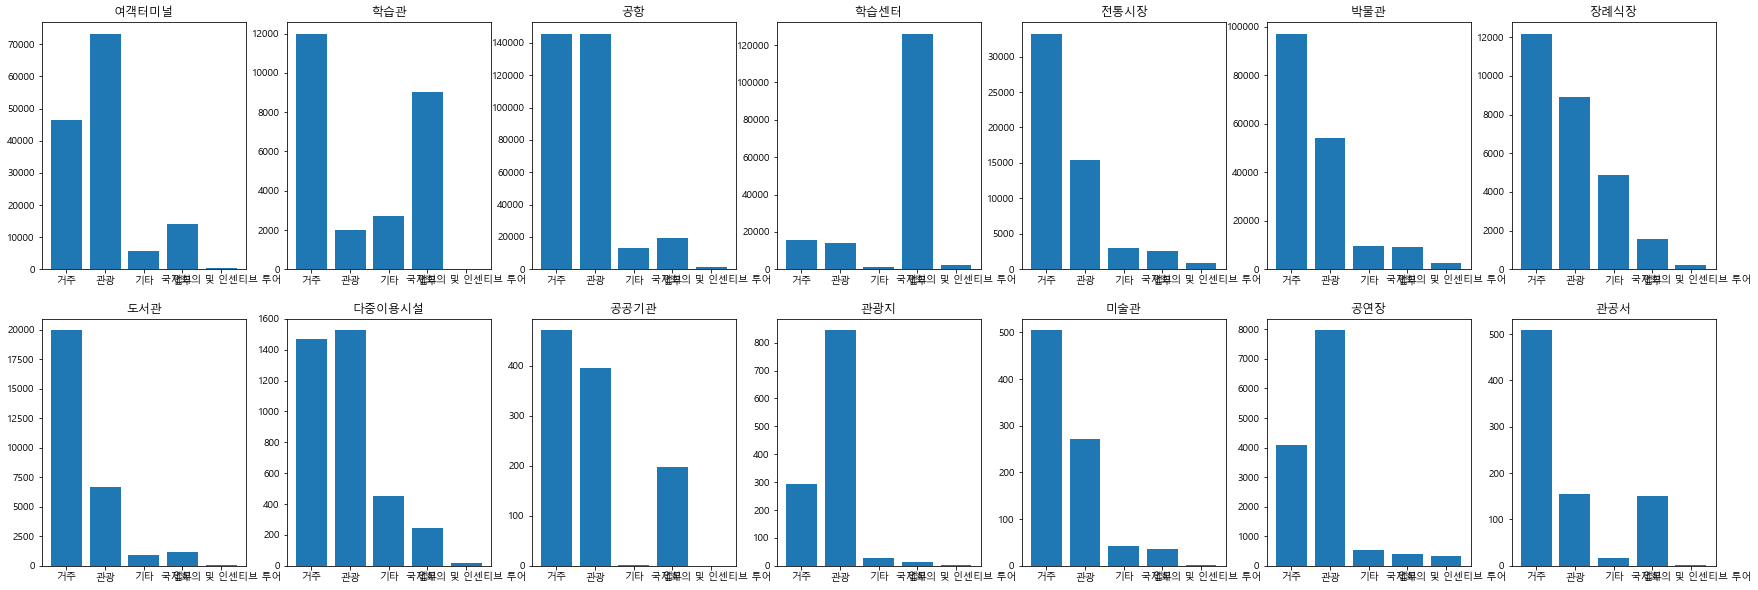

In [62]:
fig, axes = plt.subplots(2,7)
fig.set_size_inches(30,10)

x = visit_type_len('여객터미널')['visit_type']
y = visit_type_len('여객터미널')['접속 횟수']
axes[0,0].bar(x,y)

x = visit_type_len('학습관')['visit_type']
y = visit_type_len('학습관')['접속 횟수']
axes[0,1].bar(x,y)

x = visit_type_len('공항')['visit_type']
y = visit_type_len('공항')['접속 횟수']
axes[0,2].bar(x,y)

x = visit_type_len('학습센터')['visit_type']
y = visit_type_len('학습센터')['접속 횟수']
axes[0,3].bar(x,y)

x = visit_type_len('전통시장')['visit_type']
y = visit_type_len('전통시장')['접속 횟수']
axes[0,4].bar(x,y)

x = visit_type_len('박물관')['visit_type']
y = visit_type_len('박물관')['접속 횟수']
axes[0,5].bar(x,y)

x = visit_type_len('장례식장')['visit_type']
y = visit_type_len('장례식장')['접속 횟수']
axes[0,6].bar(x,y)

x = visit_type_len('도서관')['visit_type']
y = visit_type_len('도서관')['접속 횟수']
axes[1,0].bar(x,y)

x = visit_type_len('다중이용시설')['visit_type']
y = visit_type_len('다중이용시설')['접속 횟수']
axes[1,1].bar(x,y)

x = visit_type_len('공공기관')['visit_type']
y = visit_type_len('공공기관')['접속 횟수']
axes[1,2].bar(x,y)

x = visit_type_len('관광지')['visit_type']
y = visit_type_len('관광지')['접속 횟수']
axes[1,3].bar(x,y)

x = visit_type_len('미술관')['visit_type']
y = visit_type_len('미술관')['접속 횟수']
axes[1,4].bar(x,y)

x = visit_type_len('공연장')['visit_type']
y = visit_type_len('공연장')['접속 횟수']
axes[1,5].bar(x,y)

x = visit_type_len('관공서')['visit_type']
y = visit_type_len('관공서')['접속 횟수']
axes[1,6].bar(x,y)


axes[0,0].set_title('여객터미널')
axes[0,1].set_title('학습관')
axes[0,2].set_title('공항')
axes[0,3].set_title('학습센터')
axes[0,4].set_title('전통시장')
axes[0,5].set_title('박물관')
axes[0,6].set_title('장례식장')
axes[1,0].set_title('도서관')
axes[1,1].set_title('다중이용시설')
axes[1,2].set_title('공공기관')
axes[1,3].set_title('관광지')
axes[1,4].set_title('미술관')
axes[1,5].set_title('공연장')
axes[1,6].set_title('관공서')

2) 거주자 와이파이 접속 분석

In [70]:
category_list = ['버스정류소', '테마거리', '전기차충전소', '공원', '체육시설', '지하상가', '요양병원', '학습관', 
                '전통시장', '박물관', '장례식장', '도서관', '공공기관', '미술관', '관공서']

live_over_travel = East_jeju[East_jeju['ap_category'].isin(category_list)]
resident = live_over_travel[live_over_travel['visit_type']=='거주']
resident.head(3)

,base_date,user_id,mac_address,upload,download,session_time,nationality,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
12,20210101,79dd034114ab296e4cfe62245f35445ebe795bdeb5ef02...,fa941188aa9d3d91c673502ef784a0ba0490808675294c...,984777,32184544,327,대한민국,여성,10,거주,고정형,버스정류소,버스정류소_행원리[북],행원리(북)#1-1,33.553292,126.807810,제주시 구좌읍 행원리 728-3,2021,1
14,20210101,25ca90407adb861b40a17c1b6b8dbf7e3ec3ebe983cd34...,fa941188aa9d3d91c673502ef784a0ba0490808675294c...,752807,36148726,414,대한민국,여성,10,거주,고정형,버스정류소,버스정류소_행원리[북],행원리(북)#1-1,33.553292,126.807810,제주시 구좌읍 행원리 728-3,2021,1
30,20210101,78020a2cd9bb0b650993551c26111f30e56f9c7eed3142...,85e9d48ebef2c2362503a4d1df2c877367d6b1d201860f...,21820,56136,379,대한민국,여성,40,거주,고정형,버스정류소,버스정류소_탐라중학교(한일베라체방면),탐라중학교#1-1,33.490660,126.545337,제주시 아라2동 1251-6,2021,1


In [ ]:
# 버정 
res_bus = resident[resident['ap_category']=='버스정류소']
res_theme = resident[resident['ap_category']=='테마거리']
res_bus = resident[resident['ap_category']=='전기차충전소']
res_theme = resident[resident['ap_category']=='공원']
res_bus = resident[resident['ap_category']=='체육시설']
res_theme = resident[resident['ap_category']=='지하상가']
res_bus = resident[resident['ap_category']=='요양병원']
res_theme = resident[resident['ap_category']=='학습관']
res_bus = resident[resident['ap_category']=='전통시장']
res_theme = resident[resident['ap_category']=='박물관']
res_bus = resident[resident['ap_category']=='장례식장']
res_theme = resident[resident['ap_category']=='도서관']
res_bus = resident[resident['ap_category']=='공공기관']
res_theme = resident[resident['ap_category']=='미술관']
res_bus = resident[resident['ap_category']=='관공서']
